In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns
import itertools
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model


In [2]:
df = pd.read_csv("HAM10000_metadata.csv")

In [3]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [5]:
df.describe(

SyntaxError: unexpected EOF while parsing (<ipython-input-5-81bfed0ce32c>, line 1)

In [6]:
df.shape

(10015, 7)

In [11]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Bening keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
HAM10000_images_part_1 = '../Untitled_Folder'

In [12]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(HAM10000_images_part_1, '*', '*.jpg'))}

In [13]:
print(imageid_path_dict)

{'ISIC_0024306': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024306.jpg', 'ISIC_0024307': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024307.jpg', 'ISIC_0024308': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024308.jpg', 'ISIC_0024309': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024309.jpg', 'ISIC_0024310': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024310.jpg', 'ISIC_0024311': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024311.jpg', 'ISIC_0024312': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024312.jpg', 'ISIC_0024313': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024313.jpg', 'ISIC_0024314': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024314.jpg', 'ISIC_0024315': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024315.jpg', 'ISIC_0024316': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024316.jpg', 'ISIC_0024317': '../Untitled_Folder\\HAM10000_images_part_1\\ISIC_0024317.jpg', 'ISIC_0024318': '../Untitled_Folder\\HA

In [14]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

In [15]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2


In [16]:
df.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [17]:
df['age'].fillna((df['age'].mean()), inplace=True)

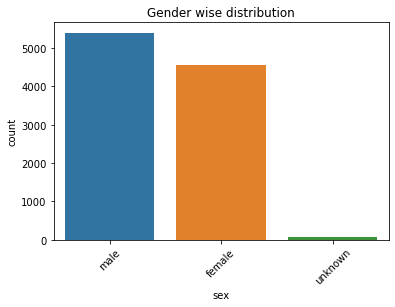

In [18]:
ax = sns.countplot(x = 'sex', data = df)
plt.title('Gender wise distribution')
plt.xticks(rotation=45)
plt.show()

In [19]:
df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

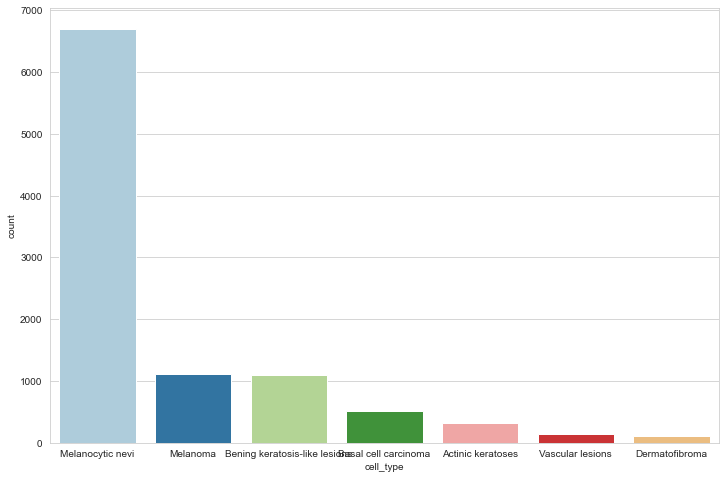

In [24]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type',data=df, order = df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

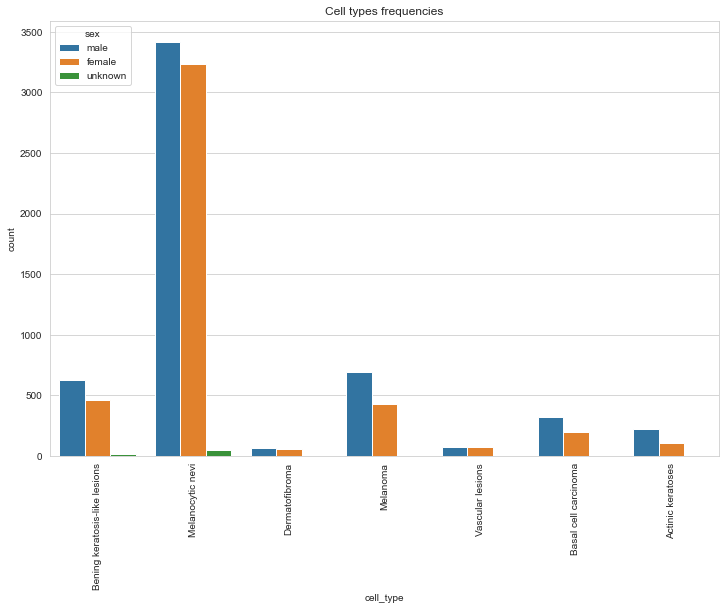

In [25]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='cell_type', hue='sex', data = df)
plt.title('Cell types frequencies')
plt.xticks(rotation=90)
plt.show()

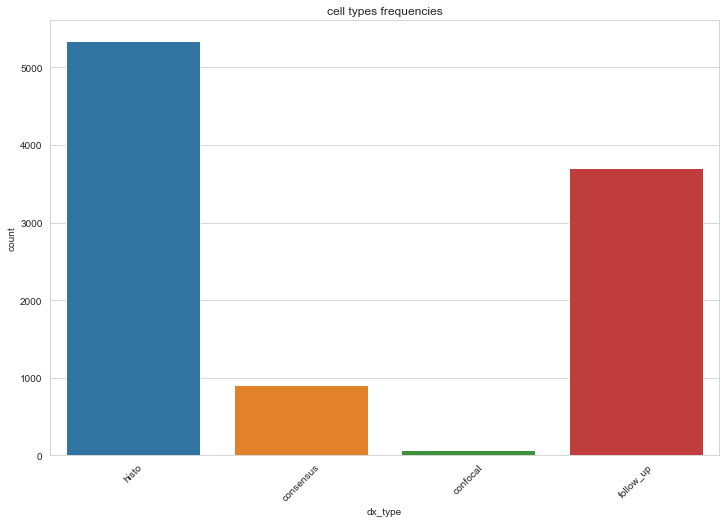

In [26]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type', data=df)
plt.title('cell types frequencies')
plt.xticks(rotation=45)
plt.show()

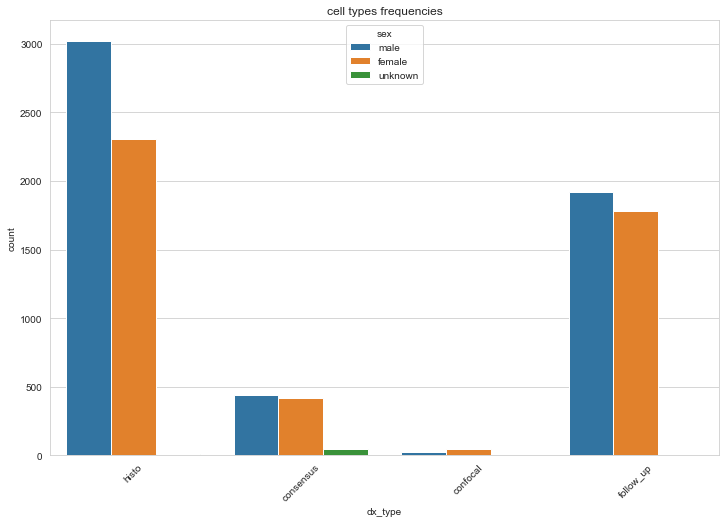

In [27]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type', hue = 'sex', data = df)
plt.title('cell types frequencies')
plt.xticks(rotation=45)
plt.show()

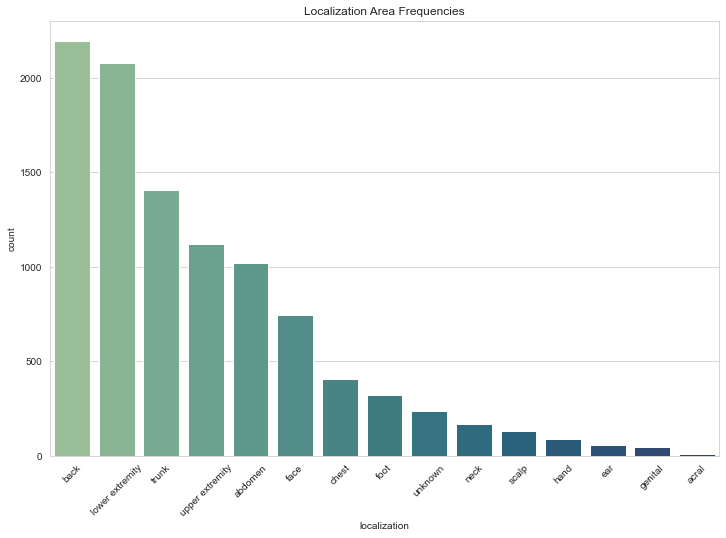

In [28]:
sns.set_style('whitegrid')
fig,axis = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization', data=df, order=df['localization'].value_counts().index, palette='crest')
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

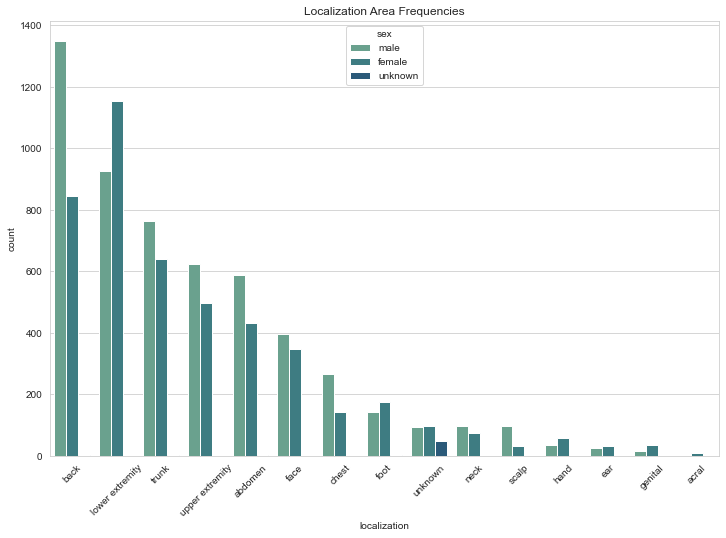

In [29]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = 'localization', hue = 'sex', data = df, order = df['localization'].value_counts().index, palette='crest')
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

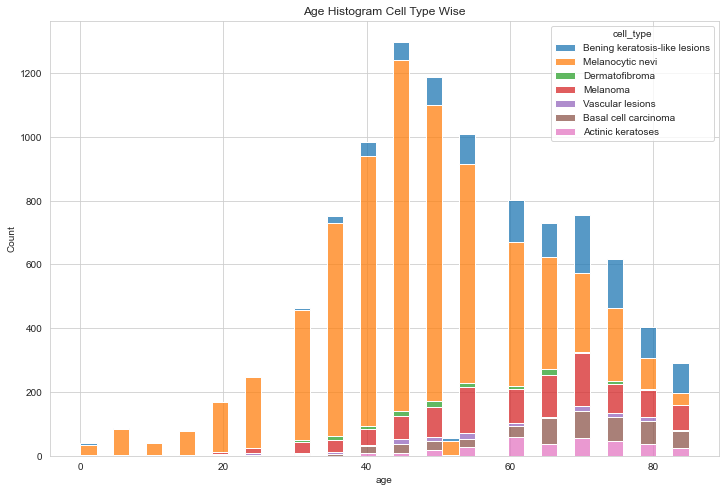

In [30]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='cell_type',multiple='stack')
plt.title('Age Histogram Cell Type Wise')
plt.show()

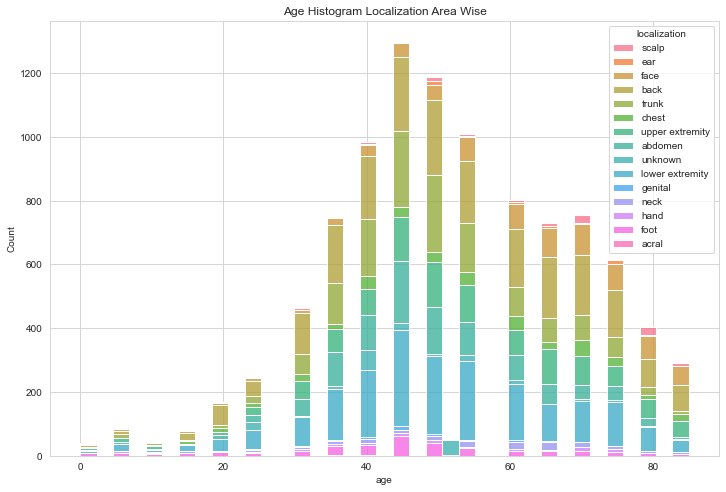

In [31]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x='age',hue='localization',multiple='stack')
plt.title('Age Histogram Localization Area Wise')
plt.show()

In [32]:
import cv2

In [33]:
# Function to read and resize images
def read_and_resize_image(image_path, size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, size)
    return img

In [34]:
image_size = (64, 64)

In [35]:
df['image'] = df['path'].apply(lambda x: read_and_resize_image(x, image_size))

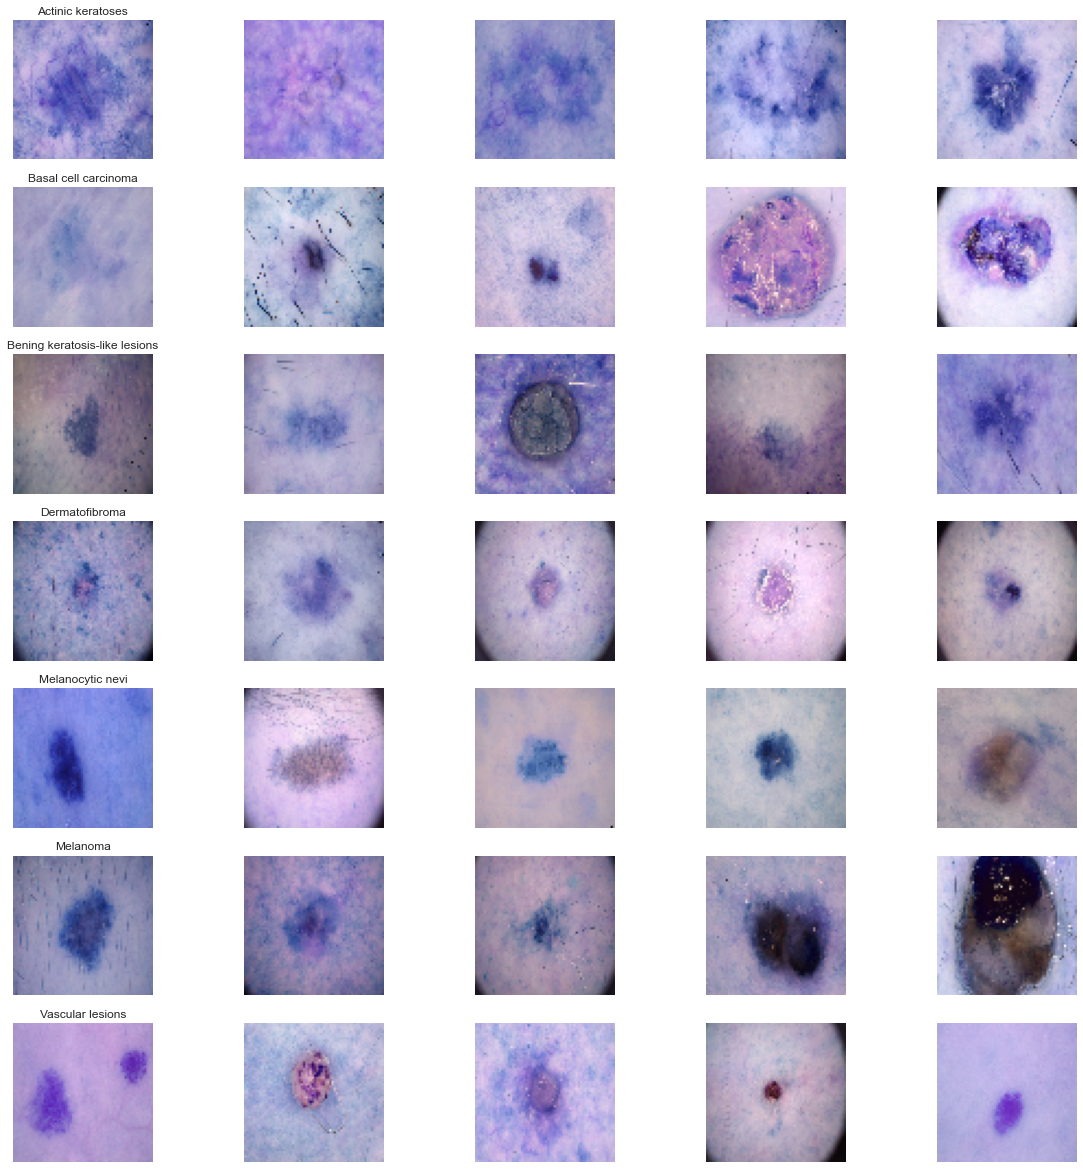

In [36]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [37]:
df['image'].map(lambda x: x.shape).value_counts()

(64, 64, 3)    10015
Name: image, dtype: int64

In [38]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['cell_type_idx'], random_state=42)

In [39]:
X_train = np.stack(train_df['image'].values)
y_train = train_df['cell_type_idx'].values
X_test = np.stack(test_df['image'].values)
y_test = test_df['cell_type_idx'].values

In [40]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(df['cell_type_idx'].unique()), activation='softmax'))

In [41]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
226/226 [==============================] - 27s 118ms/step - loss: 4.5188 - accuracy: 0.6393 - val_loss: 0.9692 - val_accuracy: 0.6883
Epoch 2/100
226/226 [==============================] - 22s 99ms/step - loss: 0.9616 - accuracy: 0.6809 - val_loss: 0.9583 - val_accuracy: 0.6858
Epoch 3/100
226/226 [==============================] - 22s 99ms/step - loss: 0.9403 - accuracy: 0.6792 - val_loss: 0.9231 - val_accuracy: 0.6870
Epoch 4/100
226/226 [==============================] - 25s 111ms/step - loss: 0.9275 - accuracy: 0.6788 - val_loss: 0.9192 - val_accuracy: 0.6908
Epoch 5/100
226/226 [==============================] - 25s 109ms/step - loss: 0.9027 - accuracy: 0.6842 - val_loss: 0.9297 - val_accuracy: 0.6808
Epoch 6/100
226/226 [==============================] - 23s 102ms/step - loss: 0.8746 - accuracy: 0.6908 - val_loss: 0.8997 - val_accuracy: 0.6895
Epoch 7/100
226/226 [==============================] - 24s 104ms/step - loss: 0.8710 - accuracy: 0.6931 - val_loss: 0.8964 - v

Epoch 57/100
226/226 [==============================] - 21s 95ms/step - loss: 0.2621 - accuracy: 0.9112 - val_loss: 1.9432 - val_accuracy: 0.6983
Epoch 58/100
226/226 [==============================] - 21s 95ms/step - loss: 0.2505 - accuracy: 0.9072 - val_loss: 2.0848 - val_accuracy: 0.6920
Epoch 59/100
226/226 [==============================] - 22s 98ms/step - loss: 0.2529 - accuracy: 0.9085 - val_loss: 2.1144 - val_accuracy: 0.6995
Epoch 60/100
226/226 [==============================] - 22s 97ms/step - loss: 0.2939 - accuracy: 0.9004 - val_loss: 1.9424 - val_accuracy: 0.6945
Epoch 61/100
226/226 [==============================] - 22s 97ms/step - loss: 0.2530 - accuracy: 0.9096 - val_loss: 1.8084 - val_accuracy: 0.6883
Epoch 62/100
226/226 [==============================] - 22s 97ms/step - loss: 0.2527 - accuracy: 0.9097 - val_loss: 2.0596 - val_accuracy: 0.6895
Epoch 63/100
226/226 [==============================] - 22s 96ms/step - loss: 0.2805 - accuracy: 0.9033 - val_loss: 1.8838 -

In [43]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the accuracy
accuracy = np.mean(y_pred_classes == y_test) * 100
print(f'Test accuracy: {accuracy:.2f}%')

Test accuracy: 68.45%


In [44]:
result_df = pd.DataFrame({'lesion_id': test_df['lesion_id'], 'target': y_test})

# Save the DataFrame to a CSV file
result_df.to_csv('submission.csv', index=False)

In [45]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2,"[[[197, 156, 193], [194, 152, 188], [190, 145,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2,"[[[25, 12, 21], [27, 14, 23], [42, 25, 36], [7..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2,"[[[138, 129, 185], [148, 134, 191], [160, 147,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2,"[[[17, 10, 23], [30, 20, 34], [47, 35, 63], [6..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Bening keratosis-like lesions,2,"[[[117, 94, 139], [139, 114, 158], [163, 134, ..."
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Actinic keratoses,0,"[[[163, 152, 165], [156, 142, 159], [141, 122,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Actinic keratoses,0,"[[[2, 6, 4], [9, 8, 8], [8, 7, 9], [24, 27, 30..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Actinic keratoses,0,"[[[108, 107, 117], [125, 127, 142], [113, 117,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../Untitled_Folder\HAM10000_images_part_1\ISIC...,Actinic keratoses,0,"[[[146, 127, 156], [129, 109, 153], [157, 134,..."


In [ ]:
result_df

In [ ]:
8053336583